In [1]:
import pandas as pd 

In [2]:
gradeRO = pd.read_csv("/Users/elizbr/Documents/2020_BFall/SI671_DM/eval/indreams_merged.csv")

In [3]:
gradeTEB = pd.read_csv("/Users/elizbr/Documents/2020_BFall/SI671_DM/eval/losingawholeyear_merged.csv")

In [4]:
gradeNO = pd.read_csv("/Users/elizbr/Documents/2020_BFall/SI671_DM/eval/roundandround_merged.csv")

rows in merged files: 
    - 1-10 spotify (baseline / overfit model)
    - 11- 20 knn on G coefficients
    - 21-30 lsi 6 topic similarity(sampled from .95)
    - 31-40 lsi 6 topc similarity(sampled from .98)
    - 41-50 lsi 4 topic similarity(sampled from .95)
    - 51-60 lsi 4 topic similarity(sampled from .98)
    - 61-70 manual function with dropped big genres 
    

In [5]:
gradeNO.shape

(70, 19)

In [6]:
# first I would like to calculate variance for each measured score. 
#The goal will be to see variance per score and see which methods create variance
#in which categories which will then qualitatively be determined for best fit

In [46]:
grade = [gradeRO, gradeTEB, gradeNO]

In [10]:
grade[0].columns #popularity, danceability, energy, key, loudness, mode, 
#speechiness, acousticness, instrumentalness, liveness, valence, tenpo

Index(['Unnamed: 0', 'id', 'uri', 'name', 'artist', 'popularity', 'tracker',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [11]:
grade[0]

,Unnamed: 0,id,uri,name,artist,popularity,tracker,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,5YsyqcewwE0c1ukzHVciS3,spotify:track:5YsyqcewwE0c1ukzHVciS3,In Dreams,Roy Orbison,57,1,0.495,0.4350,0,-9.990,1,0.0286,0.670,0.000380,0.1300,0.710,108.189,169160
1,1,5MbXzXGbqobR8xPVPs8OXA,spotify:track:5MbXzXGbqobR8xPVPs8OXA,The Only Living Boy in New York,Simon &amp; Garfunkel,65,1,0.411,0.3810,11,-12.361,1,0.0286,0.130,0.257000,0.1320,0.524,76.963,238413
2,2,27hhIs2fp6w06N5zx4Eaa5,spotify:track:27hhIs2fp6w06N5zx4Eaa5,Dream A Little Dream Of Me - With Introduction,The Mamas &amp; The Papas,68,1,0.413,0.3130,7,-13.138,1,0.0519,0.791,0.000002,0.0727,0.349,92.515,194427
3,3,02KpkaZbiutsR0ucxce4Sh,spotify:track:02KpkaZbiutsR0ucxce4Sh,This Will Be Our Year,The Zombies,61,1,0.535,0.4240,9,-7.491,1,0.0314,0.626,0.000000,0.1910,0.539,97.506,127733
4,4,7F4z7VV5aVWX72YK4bM9HB,spotify:track:7F4z7VV5aVWX72YK4bM9HB,Down In The Willow Garden,The Everly Brothers,38,1,0.236,0.1530,6,-13.279,1,0.0313,0.877,0.000000,0.1180,0.105,201.273,184667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,67,6pJeuRa8dj6Hph2r9Unn5H,spotify:track:6pJeuRa8dj6Hph2r9Unn5H,In the Chapel in the Moonlight,Kitty Kallen,4,7,0.316,0.0829,5,-14.554,1,0.0368,0.981,0.036400,0.3240,0.175,98.278,172200
66,68,4wnFpRgQu2gLN8d76dYOGr,spotify:track:4wnFpRgQu2gLN8d76dYOGr,Cry,Johnnie Ray,37,7,0.479,0.0952,0,-15.500,1,0.0274,0.849,0.000000,0.6570,0.350,69.784,181693
67,69,3F4P4eG1tzXt46bjVg8VSY,spotify:track:3F4P4eG1tzXt46bjVg8VSY,Fraulein,Steve Lawrence,4,7,0.495,0.1310,5,-10.812,1,0.0299,0.659,0.000000,0.1860,0.727,125.988,168297
68,70,02nAEJ6JUo05kr5BmfRgxf,spotify:track:02nAEJ6JUo05kr5BmfRgxf,Marie Julie,George Baker Selection,2,7,0.700,0.4790,2,-13.481,1,0.0286,0.425,0.000000,0.2610,0.925,95.938,228840


In [12]:
tracked = {}
tracked[1] = "spotify baseline / overfit model"
tracked[2] = "knn on G coefficients"
tracked[3] = "lsi 6 topic similarity sampled from .95"
tracked[4] = "lsi 6 topc similarity sampled from .98"
tracked[5] = "lsi 4 topic similaritysampled from .95"
tracked[6] = "lsi 4 topic similaritysampled from .98"
tracked[7] = "manual function"

In [34]:
tracked_list = [
    " ",
    "spotify baseline / overfit model",
    "knn on G coefficients",
    "lsi 6 topic similarity sampled from .95",
    "lsi 6 topc similarity sampled from .98",
    "lsi 4 topic similaritysampled from .95",
    "lsi 4 topic similaritysampled from .98",
    "manual function"
        ]

In [16]:
trail = gradeNO[ gradeNO.tracker == 1]

In [22]:
trail.danceability.min(), trail.danceability.max()

(0.43, 0.685)

In [245]:
variety = []
for graded_track in grade:
    run_through = graded_track.drop(columns = ['Unnamed: 0', 'id', 'uri', 'name', 'artist','duration_ms'])
    track_variety = []
    for i, row in run_through.iterrows():
        
        for i in range(1,8):
            subset_variety = {} 
            #print(i)
            g = run_through[ run_through.tracker == i]
            # print(len(g))
            subset_variety['type'] = tracked_list[i]
            subset_variety['tracker'] = i
            subset_variety['popularity'] = g.popularity.max() - g.popularity.min()
            #sc  = g.popularity.max() - g.popularity.min()
            subset_variety['danceability'] = g.danceability.max() - g.danceability.min()
            subset_variety['energy'] = g.energy.max() - g.energy.min()
            subset_variety['key'] = g.key.max() - g.key.min()
            subset_variety['loudness'] = g.loudness.max() - g.loudness.min()
            subset_variety['mode'] = g['mode'].max() - g['mode'].min()
            subset_variety['speechiness'] = g.speechiness.max() - g.speechiness.min()
            subset_variety['acousticness'] = g.acousticness.max() - g.acousticness.min()
            subset_variety['instrumentalness'] = g.instrumentalness.max() - g.instrumentalness.min()
            subset_variety['liveness'] = g.liveness.max() - g.liveness.min()
            subset_variety['valence'] = g.valence.max() - g.valence.min()
            subset_variety['tempo'] = g.tempo.max() - g.tempo.min()
            #subset_variety['duration_ms'] = g.duration_ms.max() - g.duration_ms.min()
            track_variety.append(subset_variety)
    
    variety.append(track_variety)


In [54]:
len(variety)

3

In [55]:
#grade = [gradeRO, gradeTEB, gradeNO]

In [60]:
gr_RO = pd.DataFrame(variety[0])
gr_RO.drop_duplicates(inplace = True)

gr_TEB = pd.DataFrame(variety[1])
gr_TEB.drop_duplicates(inplace = True)

gr_NO = pd.DataFrame(variety[2])
gr_NO.drop_duplicates(inplace = True)

In [64]:
gr_RO['base_track'] = 'In Dreams'
gr_RO

,type,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,base_track
0,spotify baseline / overfit model,1,30,0.385,0.6180,11,7.373,1,0.0270,0.794100,0.2570,0.1183,0.698,124.310,In Dreams
1,knn on G coefficients,2,59,0.519,0.5420,11,9.210,1,0.2354,0.669847,0.8820,0.4567,0.681,84.759,In Dreams
2,lsi 6 topic similarity sampled from .95,3,57,0.499,0.7590,11,13.389,0,0.0674,0.859986,0.2230,0.2477,0.595,98.553,In Dreams
3,lsi 6 topc similarity sampled from .98,4,30,0.252,0.5850,11,11.886,1,0.1794,0.868500,0.0241,0.2709,0.725,75.283,In Dreams
4,lsi 4 topic similaritysampled from .95,5,58,0.386,0.6820,11,10.382,1,0.3315,0.668320,0.9460,0.8792,0.435,72.680,In Dreams
5,lsi 4 topic similaritysampled from .98,6,31,0.318,0.7340,11,12.269,1,0.0453,0.859125,0.2330,0.2206,0.760,57.461,In Dreams
6,manual function,7,55,0.551,0.5021,6,8.192,1,0.0445,0.785000,0.8940,0.6006,0.812,83.767,In Dreams


In [65]:
gr_TEB['base_track'] = 'Losing A Whole Year'
gr_TEB

,type,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,base_track
0,spotify baseline / overfit model,1,41,0.260,0.716,11,9.410,1,0.0627,0.923963,0.158000,0.4402,0.678,102.647,Losing A Whole Year
1,knn on G coefficients,2,39,0.674,0.825,10,10.205,1,0.0313,0.882998,0.892998,0.4035,0.713,111.341,Losing A Whole Year
2,lsi 6 topic similarity sampled from .95,3,38,0.479,0.404,8,10.186,1,0.0521,0.311966,0.050800,0.3731,0.650,107.230,Losing A Whole Year
3,lsi 6 topc similarity sampled from .98,4,47,0.425,0.517,10,6.382,1,0.1019,0.814963,0.336000,0.7514,0.373,111.572,Losing A Whole Year
4,lsi 4 topic similaritysampled from .95,5,61,0.297,0.688,10,17.474,0,0.1942,0.709963,0.127996,0.4368,0.663,95.640,Losing A Whole Year
5,lsi 4 topic similaritysampled from .98,6,19,0.281,0.608,11,9.441,1,0.0613,0.508963,0.681998,0.2527,0.712,100.743,Losing A Whole Year
6,manual function,7,28,0.495,0.687,9,13.126,1,0.1804,0.902990,0.179000,0.7324,0.684,101.169,Losing A Whole Year


In [66]:
gr_NO['base_track'] = 'Round and Round'
gr_NO

,type,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,base_track
0,spotify baseline / overfit model,1,43,0.2550,0.362,11,8.319,1,0.1116,0.337821,0.851,0.2375,0.6220,56.212,Round and Round
1,knn on G coefficients,2,66,0.2440,0.800,11,13.646,1,0.0447,0.991000,0.813,0.5154,0.6310,71.010,Round and Round
2,lsi 6 topic similarity sampled from .95,3,53,0.6411,0.709,11,9.525,1,0.2053,0.851909,0.905,0.8888,0.9051,86.708,Round and Round
3,lsi 6 topc similarity sampled from .98,4,49,0.5950,0.306,11,10.771,1,0.2053,0.208909,0.839,0.4021,0.3110,59.623,Round and Round
4,lsi 4 topic similaritysampled from .95,5,32,0.6310,0.598,10,13.060,1,0.8598,0.759610,0.630,0.6414,0.7999,110.682,Round and Round
5,lsi 4 topic similaritysampled from .98,6,49,0.4390,0.468,11,13.397,1,0.1313,0.208909,0.693,0.2445,0.5710,59.454,Round and Round
6,manual function,7,44,0.3560,0.391,11,7.481,1,0.1451,0.490220,0.777,0.2799,0.9150,63.085,Round and Round


In [68]:
metrics = pd.concat([gr_RO, gr_TEB, gr_NO])
metrics.sort_values(['tracker'],ascending=[True])

,type,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,base_track
0,spotify baseline / overfit model,1,30,0.3850,0.6180,11,7.373,1,0.0270,0.794100,0.257000,0.1183,0.6980,124.310,In Dreams
0,spotify baseline / overfit model,1,43,0.2550,0.3620,11,8.319,1,0.1116,0.337821,0.851000,0.2375,0.6220,56.212,Round and Round
0,spotify baseline / overfit model,1,41,0.2600,0.7160,11,9.410,1,0.0627,0.923963,0.158000,0.4402,0.6780,102.647,Losing A Whole Year
1,knn on G coefficients,2,59,0.5190,0.5420,11,9.210,1,0.2354,0.669847,0.882000,0.4567,0.6810,84.759,In Dreams
1,knn on G coefficients,2,66,0.2440,0.8000,11,13.646,1,0.0447,0.991000,0.813000,0.5154,0.6310,71.010,Round and Round
1,knn on G coefficients,2,39,0.6740,0.8250,10,10.205,1,0.0313,0.882998,0.892998,0.4035,0.7130,111.341,Losing A Whole Year
2,lsi 6 topic similarity sampled from .95,3,57,0.4990,0.7590,11,13.389,0,0.0674,0.859986,0.223000,0.2477,0.5950,98.553,In Dreams
2,lsi 6 topic similarity sampled from .95,3,53,0.6411,0.7090,11,9.525,1,0.2053,0.851909,0.905000,0.8888,0.9051,86.708,Round and Round
2,lsi 6 topic similarity sampled from .95,3,38,0.4790,0.4040,8,10.186,1,0.0521,0.311966,0.050800,0.3731,0.6500,107.230,Losing A Whole Year
3,lsi 6 topc similarity sampled from .98,4,49,0.5950,0.3060,11,10.771,1,0.2053,0.208909,0.839000,0.4021,0.3110,59.623,Round and Round


In [104]:
overall_performance = metrics.groupby('type').mean()

In [105]:
overall_performance =overall_performance.sort_values('tracker', ascending= True)
overall_performance

,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
type,,,,,,,,,,,,,
spotify baseline / overfit model,1.0,38.000000,0.300000,0.565333,11.000000,8.367333,1.000000,0.067100,0.685295,0.422000,0.265333,0.666000,94.389667
knn on G coefficients,2.0,54.666667,0.479000,0.722333,10.666667,11.020333,1.000000,0.103800,0.847948,0.862666,0.458533,0.675000,89.036667
lsi 6 topic similarity sampled from .95,3.0,49.333333,0.539700,0.624000,10.000000,11.033333,0.666667,0.108267,0.674620,0.392933,0.503200,0.716700,97.497000
lsi 6 topc similarity sampled from .98,4.0,42.000000,0.424000,0.469333,10.666667,9.679667,1.000000,0.162200,0.630791,0.399700,0.474800,0.469667,82.159333
lsi 4 topic similaritysampled from .95,5.0,50.333333,0.438000,0.656000,10.333333,13.638667,0.666667,0.461833,0.712631,0.567999,0.652467,0.632633,93.000667
lsi 4 topic similaritysampled from .98,6.0,33.000000,0.346000,0.603333,11.000000,11.702333,1.000000,0.079300,0.525666,0.535999,0.239267,0.681000,72.552667
manual function,7.0,42.333333,0.467333,0.526700,8.666667,9.599667,1.000000,0.123333,0.726070,0.616667,0.537633,0.803667,82.673667


In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [207]:
x = ['Spotify', 'KNN', '6@.95', '6@.98', '4@.95', '4@.98', 'Manual'] 

overall_performance['Approach'] = x


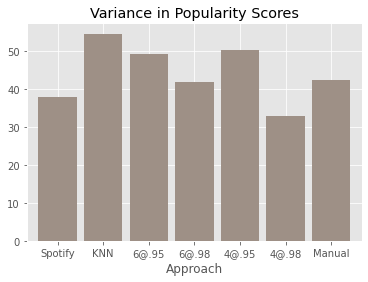

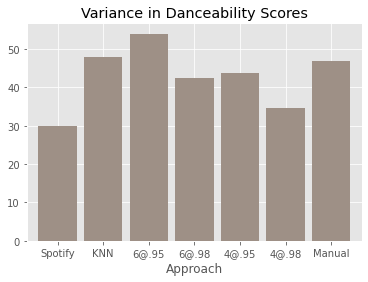

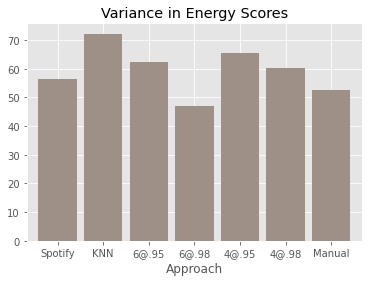

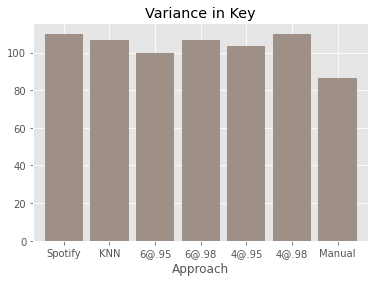

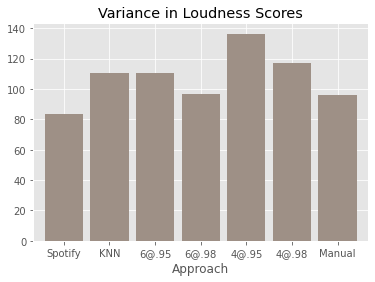

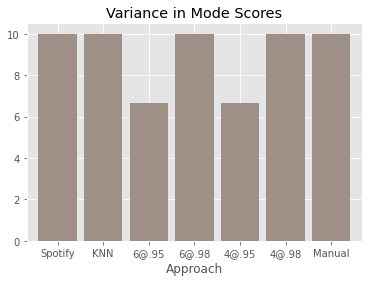

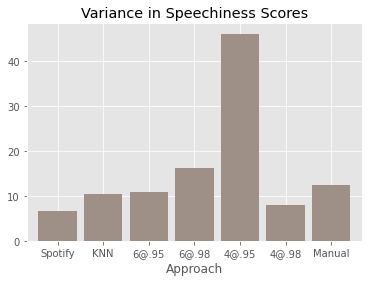

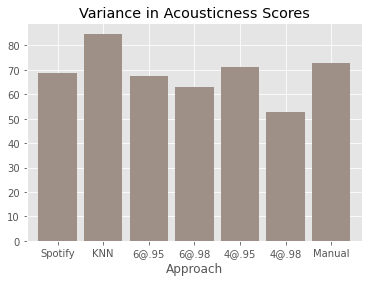

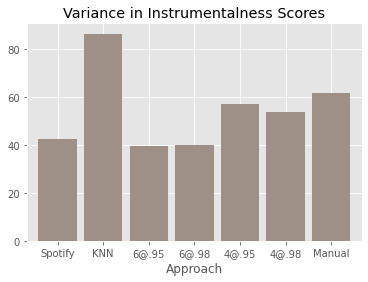

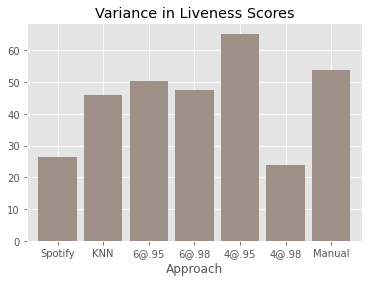

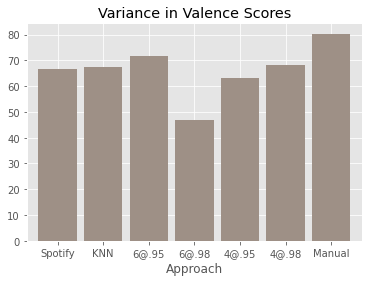

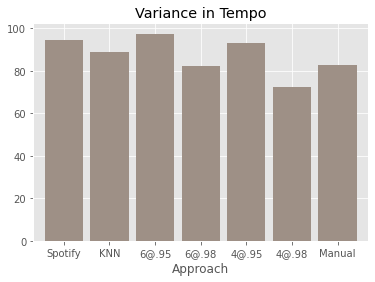

In [266]:
with plt.style.context('ggplot'):
    overall_performance.plot(y ='popularity', x= 'Approach', kind="bar", title = 'Variance in Popularity Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='danceability', x= 'Approach', kind="bar", title = 'Variance in Danceability Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='energy', x= 'Approach',  kind="bar", title = 'Variance in Energy Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='key', x= 'Approach', kind="bar", title = 'Variance in Key', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)

    overall_performance.plot(y ='loudness', x= 'Approach', kind="bar", title = 'Variance in Loudness Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='mode', x= 'Approach', kind="bar", title = 'Variance in Mode Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='speechiness', x= 'Approach', kind="bar", title = 'Variance in Speechiness Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='acousticness', x= 'Approach', kind="bar", title = 'Variance in Acousticness Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)
    
    overall_performance.plot(y ='instrumentalness', x= 'Approach', kind="bar", title = 'Variance in Instrumentalness Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)

    overall_performance.plot(y ='liveness', x= 'Approach', kind="bar", title = 'Variance in Liveness Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)

    overall_performance.plot(y ='valence', x= 'Approach', kind="bar", title = 'Variance in Valence Scores', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)

    overall_performance.plot(y ='tempo', x= 'Approach', kind="bar", title = 'Variance in Tempo', legend=None, 
                             color = '#9e9086',  width=0.84)
    plt.xticks(rotation = 0)

    

In [267]:
normalized_op = overall_performance
#normalized_op.danceability = normalized_op.danceability * 100
#normalized_op.energy = normalized_op.energy * 100
#normalized_op.speechiness = normalized_op.speechiness * 100
#normalized_op.acousticness = normalized_op.acousticness * 100
#normalized_op.instrumentalness = normalized_op.instrumentalness * 100
#normalized_op.liveness = normalized_op.liveness * 100
#normalized_op.valence = normalized_op.valence * 100
#normalized_op.loudness = normalized_op.loudness * 10
#normalized_op['mode'] = normalized_op['mode'] * 10
#normalized_op.speechiness = normalized_op.speechiness * 10
#normalized_op.key = normalized_op.key * 10
#normalized_op.loudness = normalized_op.loudness / 10
normalized_op.speechiness = normalized_op.speechiness / 10
normalized_op

,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,title,approach,Approach
type,,,,,,,,,,,,,,,,
spotify baseline / overfit model,1.0,38.000000,30.000000,56.533333,110.000000,83.673333,10.000000,0.671000,68.529473,42.200000,26.533333,66.600000,94.389667,spotify,spotify,Spotify
knn on G coefficients,2.0,54.666667,47.900000,72.233333,106.666667,110.203333,10.000000,1.038000,84.794819,86.266610,45.853333,67.500000,89.036667,knn/network,knn/network,KNN
lsi 6 topic similarity sampled from .95,3.0,49.333333,53.970000,62.400000,100.000000,110.333333,6.666667,1.082667,67.462030,39.293333,50.320000,71.670000,97.497000,LSI 6 @ .95,LSI 6 @ .95,6@.95
lsi 6 topc similarity sampled from .98,4.0,42.000000,42.400000,46.933333,106.666667,96.796667,10.000000,1.622000,63.079067,39.970000,47.480000,46.966667,82.159333,LSI 6 @ .98,LSI 6 @ .98,6@.98
lsi 4 topic similaritysampled from .95,5.0,50.333333,43.800000,65.600000,103.333333,136.386667,6.666667,4.618333,71.263107,56.799853,65.246667,63.263333,93.000667,LSI 4 @ .95,LSI 4 @ .95,4@.95
lsi 4 topic similaritysampled from .98,6.0,33.000000,34.600000,60.333333,110.000000,117.023333,10.000000,0.793000,52.566567,53.599928,23.926667,68.100000,72.552667,LSI 4 @ .98,LSI 4 @ .98,4@.98
manual function,7.0,42.333333,46.733333,52.670000,86.666667,95.996667,10.000000,1.233333,72.606993,61.666667,53.763333,80.366667,82.673667,Manual,Manual,Manual


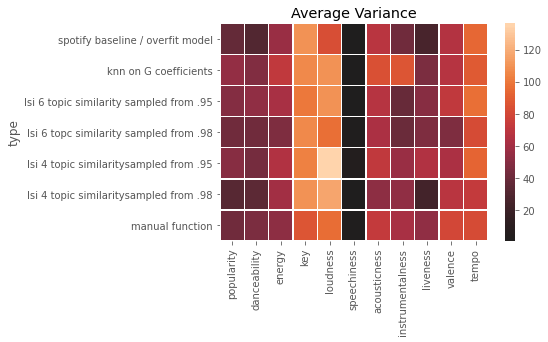

In [268]:
with plt.style.context('ggplot'):
    ht_input = overall_performance.drop(columns = ['tracker', 'mode', 'approach', 'title', 'Approach'])
    ax = sns.heatmap(ht_input, center=0, annot= False, linewidths=.5)
    ax.set_title('Average Variance')

    #ax.title('Variance in Sample Lists')

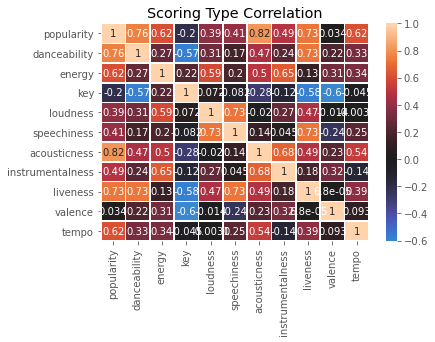

In [269]:
with plt.style.context('ggplot'):
    g = ht_input.corr()
    ax = sns.heatmap(g, center=0, annot= True, linewidths=.5)
    ax.set_title('Scoring Type Correlation')

### Pivot 

In [273]:
overall_performance

,tracker,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,title,approach,Approach
type,,,,,,,,,,,,,,,,
spotify baseline / overfit model,1.0,38.000000,30.000000,56.533333,110.000000,83.673333,10.000000,0.671000,68.529473,42.200000,26.533333,66.600000,94.389667,spotify,spotify,Spotify
knn on G coefficients,2.0,54.666667,47.900000,72.233333,106.666667,110.203333,10.000000,1.038000,84.794819,86.266610,45.853333,67.500000,89.036667,knn/network,knn/network,KNN
lsi 6 topic similarity sampled from .95,3.0,49.333333,53.970000,62.400000,100.000000,110.333333,6.666667,1.082667,67.462030,39.293333,50.320000,71.670000,97.497000,LSI 6 @ .95,LSI 6 @ .95,6@.95
lsi 6 topc similarity sampled from .98,4.0,42.000000,42.400000,46.933333,106.666667,96.796667,10.000000,1.622000,63.079067,39.970000,47.480000,46.966667,82.159333,LSI 6 @ .98,LSI 6 @ .98,6@.98
lsi 4 topic similaritysampled from .95,5.0,50.333333,43.800000,65.600000,103.333333,136.386667,6.666667,4.618333,71.263107,56.799853,65.246667,63.263333,93.000667,LSI 4 @ .95,LSI 4 @ .95,4@.95
lsi 4 topic similaritysampled from .98,6.0,33.000000,34.600000,60.333333,110.000000,117.023333,10.000000,0.793000,52.566567,53.599928,23.926667,68.100000,72.552667,LSI 4 @ .98,LSI 4 @ .98,4@.98
manual function,7.0,42.333333,46.733333,52.670000,86.666667,95.996667,10.000000,1.233333,72.606993,61.666667,53.763333,80.366667,82.673667,Manual,Manual,Manual


In [279]:
GG = overall_performance.drop(columns = ['approach', 'title', 'tracker'])

In [286]:
JGK = GG.groupby('Approach')

In [290]:
JGK.plot(JGK, type = 'bar')

/Users/elizbr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

### Variance between scoring for the three tracks separate

In [251]:
typesII = metrics.type.drop_duplicates().tolist()
typesII

['spotify baseline / overfit model',
 'knn on G coefficients',
 'lsi 6 topic similarity sampled from .95',
 'lsi 6 topc similarity sampled from .98',
 'lsi 4 topic similaritysampled from .95',
 'lsi 4 topic similaritysampled from .98',
 'manual function']

In [253]:
other_variety = []

for typeI in typesII:
    g = metrics[ metrics.type == typeI]
    print(typeI)
    for i, row in g.iterrows():
        type_content = {}
        #print(len(g))
        type_content['type'] = typeI
        type_content['popularity'] = g.popularity.max() - g.popularity.min()
        #sc  = g.popularity.max() - g.popularity.min()
        type_content['danceability'] = g.danceability.max() - g.danceability.min()
        type_content['energy'] = g.energy.max() - g.energy.min()
        type_content['key'] = g.key.max() - g.key.min()
        type_content['loudness'] = g.loudness.max() - g.loudness.min()
        type_content['mode'] = g['mode'].max() - g['mode'].min()
        type_content['speechiness'] = g.speechiness.max() - g.speechiness.min()
        type_content['acousticness'] = g.acousticness.max() - g.acousticness.min()
        type_content['instrumentalness'] = g.instrumentalness.max() - g.instrumentalness.min()
        type_content['liveness'] = g.liveness.max() - g.liveness.min()
        type_content['valence'] = g.valence.max() - g.valence.min()
        type_content['tempo'] = g.tempo.max() - g.tempo.min()
        #subset_variety['duration_ms'] = g.duration_ms.max() - g.duration_ms.min()
        other_variety.append(type_content)
        
        

len(other_variety)

spotify baseline / overfit model
knn on G coefficients
lsi 6 topic similarity sampled from .95
lsi 6 topc similarity sampled from .98
lsi 4 topic similaritysampled from .95
lsi 4 topic similaritysampled from .98
manual function


21

In [254]:
variety_within = pd.DataFrame(other_variety)
variety_within.drop_duplicates(inplace = True)

In [257]:
variety_within['Approach'] = ['Spotify', 'KNN', '6@.95', '6@.98', '4@.95', '4@.98', 'Manual'] 

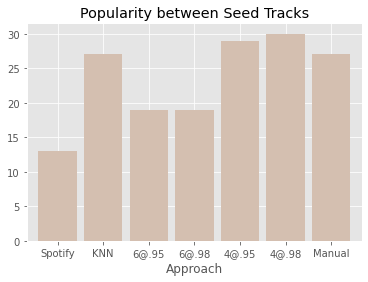

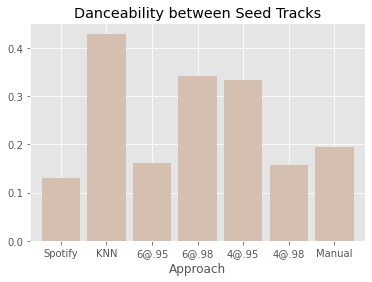

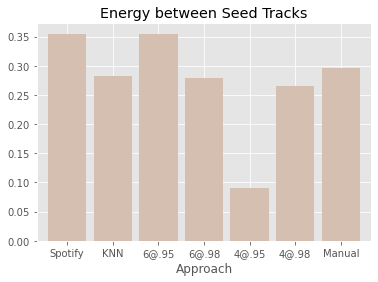

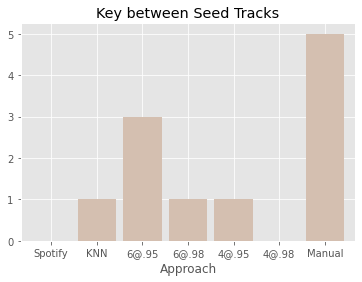

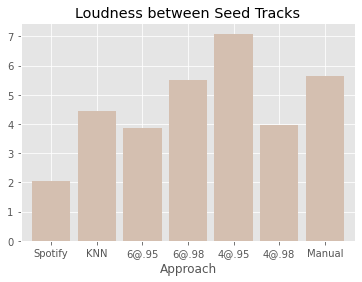

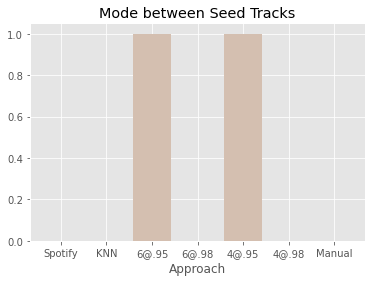

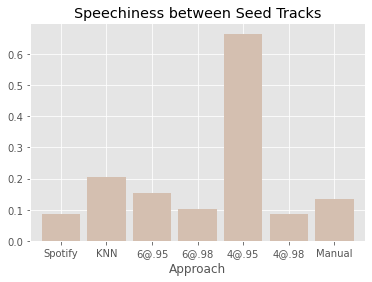

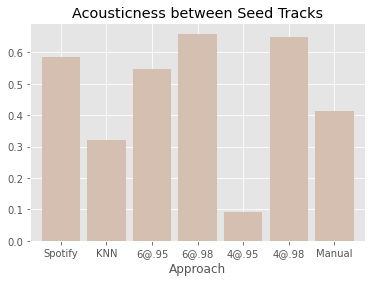

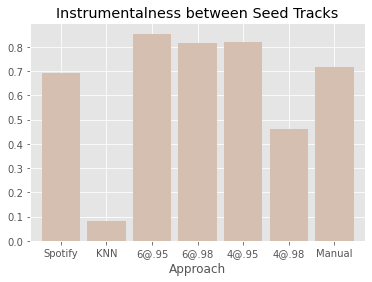

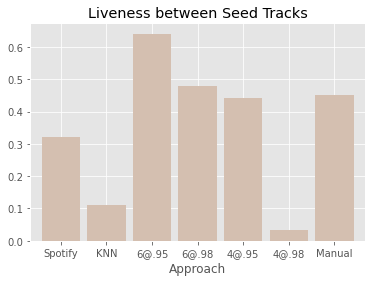

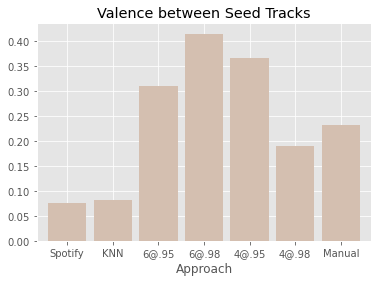

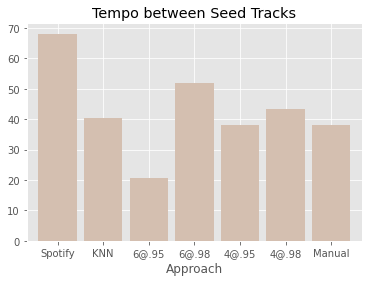

In [261]:
with plt.style.context('ggplot'):
    colour = '#d4bfb0'
    variety_within.plot(y ='popularity', x= 'Approach', kind="bar", title = 'Popularity between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='danceability', x= 'Approach', kind="bar", title = 'Danceability between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='energy', x= 'Approach',  kind="bar", title = 'Energy between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='key', x= 'Approach', kind="bar", title = 'Key between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)

    variety_within.plot(y ='loudness', x= 'Approach', kind="bar", title = 'Loudness between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='mode', x= 'Approach', kind="bar", title = 'Mode between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='speechiness', x= 'Approach', kind="bar", title = 'Speechiness between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='acousticness', x= 'Approach', kind="bar", title = 'Acousticness between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)
    
    variety_within.plot(y ='instrumentalness', x= 'Approach', kind="bar", title = 'Instrumentalness between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)

    variety_within.plot(y ='liveness', x= 'Approach', kind="bar", title = 'Liveness between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)

    variety_within.plot(y ='valence', x= 'Approach', kind="bar", title = 'Valence between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)

    variety_within.plot(y ='tempo', x= 'Approach', kind="bar", title = 'Tempo between Seed Tracks', legend=None, 
                             color = colour,  width=0.84)
    plt.xticks(rotation = 0)